In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### tesk 1 mins..
## lets read rating.csv & consider ['userId', 'movieId', 'rating'] to get rid of memory-error.. &
## & just to load faster..

data = pd.read_csv(r"F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/rating.csv",usecols=['userId', 'movieId', 'rating'])

In [ ]:
### dont read file again & again , otherwise u will end up having
# memory-error as pandas is unable to handle such huge data

In [3]:
data.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [4]:
data.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [6]:
data.shape

(20000263, 3)

In [7]:
# now we have to Use small amount of data => otherwise pandas gives error => 
# pivot_table on large data does not work,int32 overflow

## if system is unable to handle huge data , we can think of a sample as :
# data=data[100000:]

df = data[0:100000]
df.shape

(100000, 3)

In [8]:
## lets read movie.csv
titles = pd.read_csv("F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/movie.csv")
titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
# Merge the ratings and movies dataframe
df = pd.merge(df, titles, on="movieId")
df.head()

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
movie_rating_count=df.groupby(['title'])['rating'].count().\
            reset_index().rename(columns = {'rating':'TotalRatingCount'})

In [11]:
movie_rating_count

,title,TotalRatingCount
0,'Hellboy': The Seeds of Creation (2004),1
1,'Neath the Arizona Skies (1934),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",14
...,...,...
8220,"\\""Great Performances\""\"" Cats (1998)""",1
8221,eXistenZ (1999),35
8222,xXx (2002),22
8223,xXx: State of the Union (2005),4


In [12]:
final=df.merge(movie_rating_count, left_on='title',right_on='title',\
               how='left')

In [13]:
final.shape

(100000, 6)

In [14]:
final.head(3)

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112


In [15]:
### lets store this into clean_data.csv

final.to_csv(r'F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/clean_data.csv',index=False)

In [16]:
import seaborn as sns

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRatingCount'>

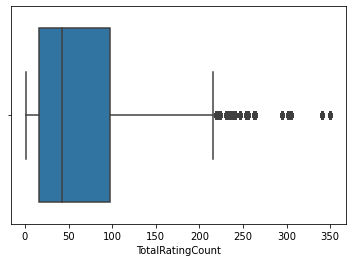

In [17]:
sns.boxplot(final['TotalRatingCount'])

In [18]:
final['TotalRatingCount'].quantile(0.1)

5.0

In [19]:
for i in range(0,101,10):
    print('{}th percentile value is {}'.\
          format(i,final['TotalRatingCount'].quantile(i/100)))

0th percentile value is 1.0
10th percentile value is 5.0
20th percentile value is 11.0
30th percentile value is 20.0
40th percentile value is 29.0
50th percentile value is 42.0
60th percentile value is 61.0
70th percentile value is 80.0
80th percentile value is 112.0
90th percentile value is 164.0
100th percentile value is 350.0


In [20]:
final.shape

(100000, 6)

In [21]:
popularity_threshold = 61
rating_popular_movie = final.query('TotalRatingCount >=@popularity_threshold')
rating_popular_movie.head()


### final[final['TotalRatingCount']>10000]

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112


In [22]:
rating_popular_movie.shape

(40165, 6)

In [23]:
# Sort the rating from highest to lowest based on the rating value
rating_popular_movie.groupby('title')['rating'].mean().\
                    sort_values(ascending=False).head()

title
Godfather: Part II, The (1974)            4.419708
Shawshank Redemption, The (1994)          4.413115
Rear Window (1954)                        4.398734
Godfather, The (1972)                     4.395939
One Flew Over the Cuckoo's Nest (1975)    4.354730
Name: rating, dtype: float64

In [24]:
moviemat=rating_popular_movie.pivot_table(index="userId",\
                          columns="title", values='rating')
moviemat.head()

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,4.0,NaN,NaN,NaN,5.0,4.0,5.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [25]:
moviemat

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,4.0,NaN,NaN,NaN,5.0,4.0,5.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,4.0,NaN,NaN,4.0,3.0,NaN,3.0,NaN,4.0,NaN,...,5.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.5


In [26]:
## lets consider 'Airplane! (1980)'
moviemat['Airplane! (1980)']



### ie 699 user_id gives ratings as 4.0


userId
1      NaN
2      2.0
3      5.0
4      NaN
5      NaN
      ... 
698    NaN
699    4.0
700    NaN
701    NaN
702    NaN
Name: Airplane! (1980), Length: 697, dtype: float64

In [27]:
## lets consider similar movies with respect to 'Forrest Gump (1994)'

similarity=moviemat.corrwith(moviemat['Airplane! (1980)'])

In [28]:
similarity.sort_values(ascending=False)


### ie 'moviemat['Airplane! (1980)']' is co-related with 
#'Casper (1995)' with 68% co-relation..

title
Airplane! (1980)                                        1.000000
Casper (1995)                                           0.680396
Galaxy Quest (1999)                                     0.661684
Bridge on the River Kwai, The (1957)                    0.629462
Santa Clause, The (1994)                                0.603553
                                                          ...   
Crying Game, The (1992)                                -0.301612
Desperado (1995)                                       -0.330267
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)   -0.349704
Mr. Holland's Opus (1995)                              -0.357667
As Good as It Gets (1997)                              -0.402779
Length: 368, dtype: float64

In [29]:
co_reln=similarity.sort_values(ascending=False).reset_index().\
        rename(columns={0:'co-relation_values'})

In [30]:
co_reln

,title,co-relation_values
0,Airplane! (1980),1.000000
1,Casper (1995),0.680396
2,Galaxy Quest (1999),0.661684
3,"Bridge on the River Kwai, The (1957)",0.629462
4,"Santa Clause, The (1994)",0.603553
...,...,...
363,"Crying Game, The (1992)",-0.301612
364,Desperado (1995),-0.330267
365,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704
366,Mr. Holland's Opus (1995),-0.357667


In [31]:
rat=pd.DataFrame(rating_popular_movie.groupby(['title']).\
                 agg({'title':'count','rating':'mean'})).\
rename(columns={'title':'total_ratings','rating':'mean_rating'}).reset_index()                 

In [32]:
rat

,title,total_ratings,mean_rating
0,12 Angry Men (1957),73,4.164384
1,2001: A Space Odyssey (1968),128,4.003906
2,A.I. Artificial Intelligence (2001),63,3.111111
3,"Abyss, The (1989)",89,3.494382
4,Ace Ventura: Pet Detective (1994),193,2.891192
...,...,...,...
363,"Wizard of Oz, The (1939)",117,3.944444
364,"X-Files: Fight the Future, The (1998)",61,3.434426
365,X-Men (2000),132,3.621212
366,X2: X-Men United (2003),76,3.664474


In [33]:
cor=co_reln.merge(rat,on='title')

In [34]:
cor

,title,co-relation_values,total_ratings,mean_rating
0,Airplane! (1980),1.000000,84,3.666667
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
...,...,...,...,...
363,"Crying Game, The (1992)",-0.301612,62,3.782258
364,Desperado (1995),-0.330267,80,3.262500
365,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704,128,4.273438
366,Mr. Holland's Opus (1995),-0.357667,100,3.815000


In [35]:
### top 10 HIghest recommened movies if user is watching 'Airplane! (1980)'..
cor.sort_values('co-relation_values',ascending=False)[1:11]

,title,co-relation_values,total_ratings,mean_rating
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
5,Unforgiven (1992),0.602800,79,3.791139
6,Tomorrow Never Dies (1997),0.602446,71,3.267606
7,Monty Python and the Holy Grail (1975),0.601236,166,4.186747
8,"Terminator, The (1984)",0.580656,160,3.912500
9,Coneheads (1993),0.556090,85,2.882353
10,Chicken Run (2000),0.544424,76,3.322368


### lets automate all the recommendation..

In [36]:
def recommend_movies(movie):
    similarity=moviemat.corrwith(moviemat[movie])
    return similarity.sort_values(ascending=False)[1:11]
    

In [37]:
recommend_movies('Casper (1995)')

title
Wayne's World (1992)                                                                              0.930651
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.880848
Pleasantville (1998)                                                                              0.866816
Notting Hill (1999)                                                                               0.802955
Talented Mr. Ripley, The (1999)                                                                   0.799671
City of God (Cidade de Deus) (2002)                                                               0.798554
Little Mermaid, The (1989)                                                                        0.794992
Naked Gun 33 1/3: The Final Insult (1994)                                                         0.781180
Last Action Hero (1993)                                                                           0.776395
Big (1988)                     